In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

# Load your dataset
file_path = 'data/df_output/df_cleaned.csv'
data = pd.read_csv(file_path)

# Define features (X) and target variable (y)
features_to_keep = ['TDS', 'LATITUDE', 'LONGITUDE', 'API', 'DEPTHUPPER', 'DEPTHLOWER', 
                    'PH', 'B', 'Ba', 'Br', 'HCO3', 'Ca', 'Cl', 'FeTot', 'K', 'Mg', 'Na', 
                    'SO4', 'Sr', 'Zn', 'CHARGEBAL', 'BASIN_CATEGORY', 'FORMSIMPLE']
target_variable = 'Li'

X = data[features_to_keep]  # Features
y = data[target_variable]   # Target variable

# Impute missing values in the target variable (y)
y_imputer = SimpleImputer(strategy='mean')
y = y_imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

In [70]:
# Define and train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [71]:

# Define categorical and numeric features
categorical_features = ['FORMSIMPLE','BASIN_CATEGORY']
numeric_features = ['TDS', 'LATITUDE', 'LONGITUDE', 'API', 'DEPTHUPPER', 'DEPTHLOWER', 'PH', 'B', 'Ba', 'Br', 'HCO3', 'Ca', 'Cl', 'FeTot', 'K', 'Mg', 'Na', 'SO4', 'Sr', 'Zn', 'CHARGEBAL']

In [73]:
# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [74]:
# Define the pipeline with preprocessing and logistic regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('log_reg_model', LogisticRegression())
])


In [75]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [77]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['TDS', 'LATITUDE',
                                                   'LONGITUDE', 'API',
                                                   'DEPTHUPPER', 'DEPTHLOWER',
                                                   'PH', 'B', 'Ba', 'Br',
                                                   'HCO3', 'Ca', 'Cl', 'FeTot',
                                                   'K', 'Mg', 'Na', 'SO4', 'Sr',
                                                   'Zn', 'CHARGEBAL']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['FORMSIMPLE',
                                                   'BASIN_CATEGORY'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [78]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [90]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.6777965691423844


In [94]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 387.6884475431959
Root Mean Squared Error: 19.68980567560777
R-squared (R2) Score: 0.4185421882663545


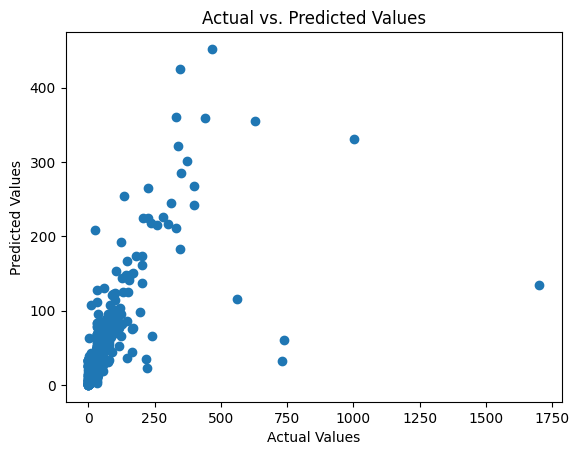

In [95]:
# Actual vs Predicted Plots 
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


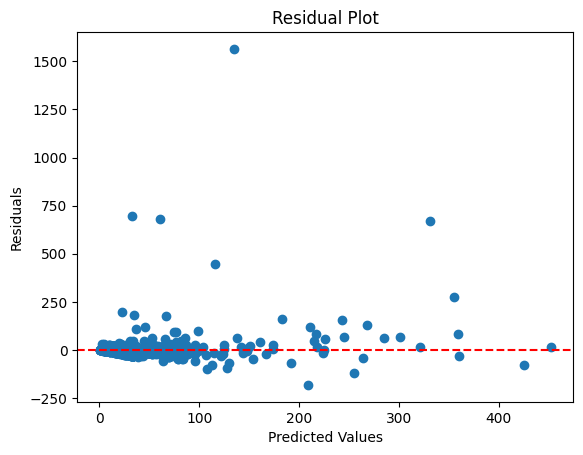

In [96]:
# Residual Plot 
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.show()
